<a href="https://colab.research.google.com/github/ituki0426/AI/blob/main/Kaggle_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Init

In [1]:
!pip install git+https://github.com/Kaggle/learntools.git

  Cloning https://github.com/Kaggle/learntools.git to /tmp/pip-req-build-u4wisbg6
  Running command git clone --filter=blob:none --quiet https://github.com/Kaggle/learntools.git /tmp/pip-req-build-u4wisbg6
  Resolved https://github.com/Kaggle/learntools.git to commit 7a83948d1820d0282e518fc44692bb3118c9e1a6
  Preparing metadata (setup.py) ... done
  Created wheel for learntools: filename=learntools-0.3.4-py3-none-any.whl size=268963 sha256=1b1cb1ae76804d7b1dd538c903d65e2bd12eff859f10365a27b5f1e58f26b5c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-va4wvnbn/wheels/2f/6c/3c/aa9f50cfb5a862157cb4c7a5b34881828cf45404698255dced
Successfully built learntools


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import csv
from IPython.display import display
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.Gradient Descen

In [ ]:
red_wine = open('/content/drive/MyDrive/data/winequality-red.csv', encoding='utf-8')
red_wine = pd.read_csv(red_wine)
df_train , df_valid = train_test_split(red_wine, test_size=0.2)

max_ = df_train.max()
min_ = df_train.min()

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

print(X_train.shape)

(1279, 11)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu',input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer = 'adam',
    loss = 'mae' ,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 2s 128ms/step - loss: 0.2734 - val_loss: 0.1403
Epoch 2/10
5/5 [==============================] - 0s 50ms/step - loss: 0.1452 - val_loss: 0.1303
Epoch 3/10
5/5 [==============================] - 0s 55ms/step - loss: 0.1222 - val_loss: 0.1270
Epoch 4/10
5/5 [==============================] - 0s 57ms/step - loss: 0.1127 - val_loss: 0.1129
Epoch 5/10
5/5 [==============================] - 0s 46ms/step - loss: 0.1067 - val_loss: 0.1116
Epoch 6/10
5/5 [==============================] - 0s 51ms/step - loss: 0.1042 - val_loss: 0.1117
Epoch 7/10
5/5 [==============================] - 0s 52ms/step - loss: 0.1032 - val_loss: 0.1130
Epoch 8/10
5/5 [==============================] - 0s 50ms/step - loss: 0.1031 - val_loss: 0.1152
Epoch 9/10
5/5 [==============================] - 0s 53ms/step - loss: 0.1004 - val_loss: 0.1118
Epoch 10/10
5/5 [==============================] - 0s 53ms/step - loss: 0.0988 - val_loss: 0.1106


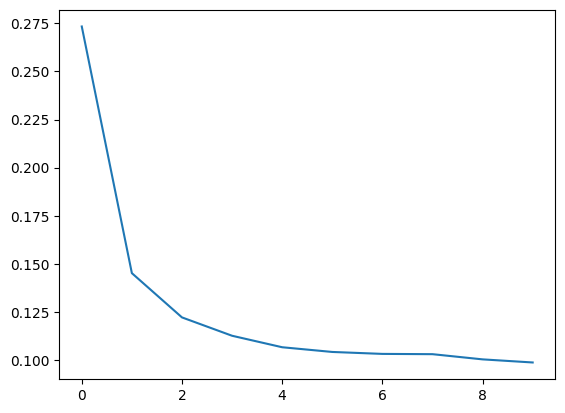

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

# 3.Exercise: Stochastic Gradient Descent

In [ ]:
import matplotlib.pyplot as plt
from learntools.deep_learning_intro.dltools import animate_sgd


# 4.Linear Regression With Time

## Welcome to Time Series!

予測は現実世界において機械学習の最も一般的なアプリケーションであるかもしれません。



In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv(
    '/content/drive/MyDrive/data/book_sales.csv',
    index_col='Date',
    parse_dates=['Date']
).drop('Paperback', axis=1)

df['Time'] = np.arange(len(df.index))
df.head()


,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


<ipython-input-7-762606f217de>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


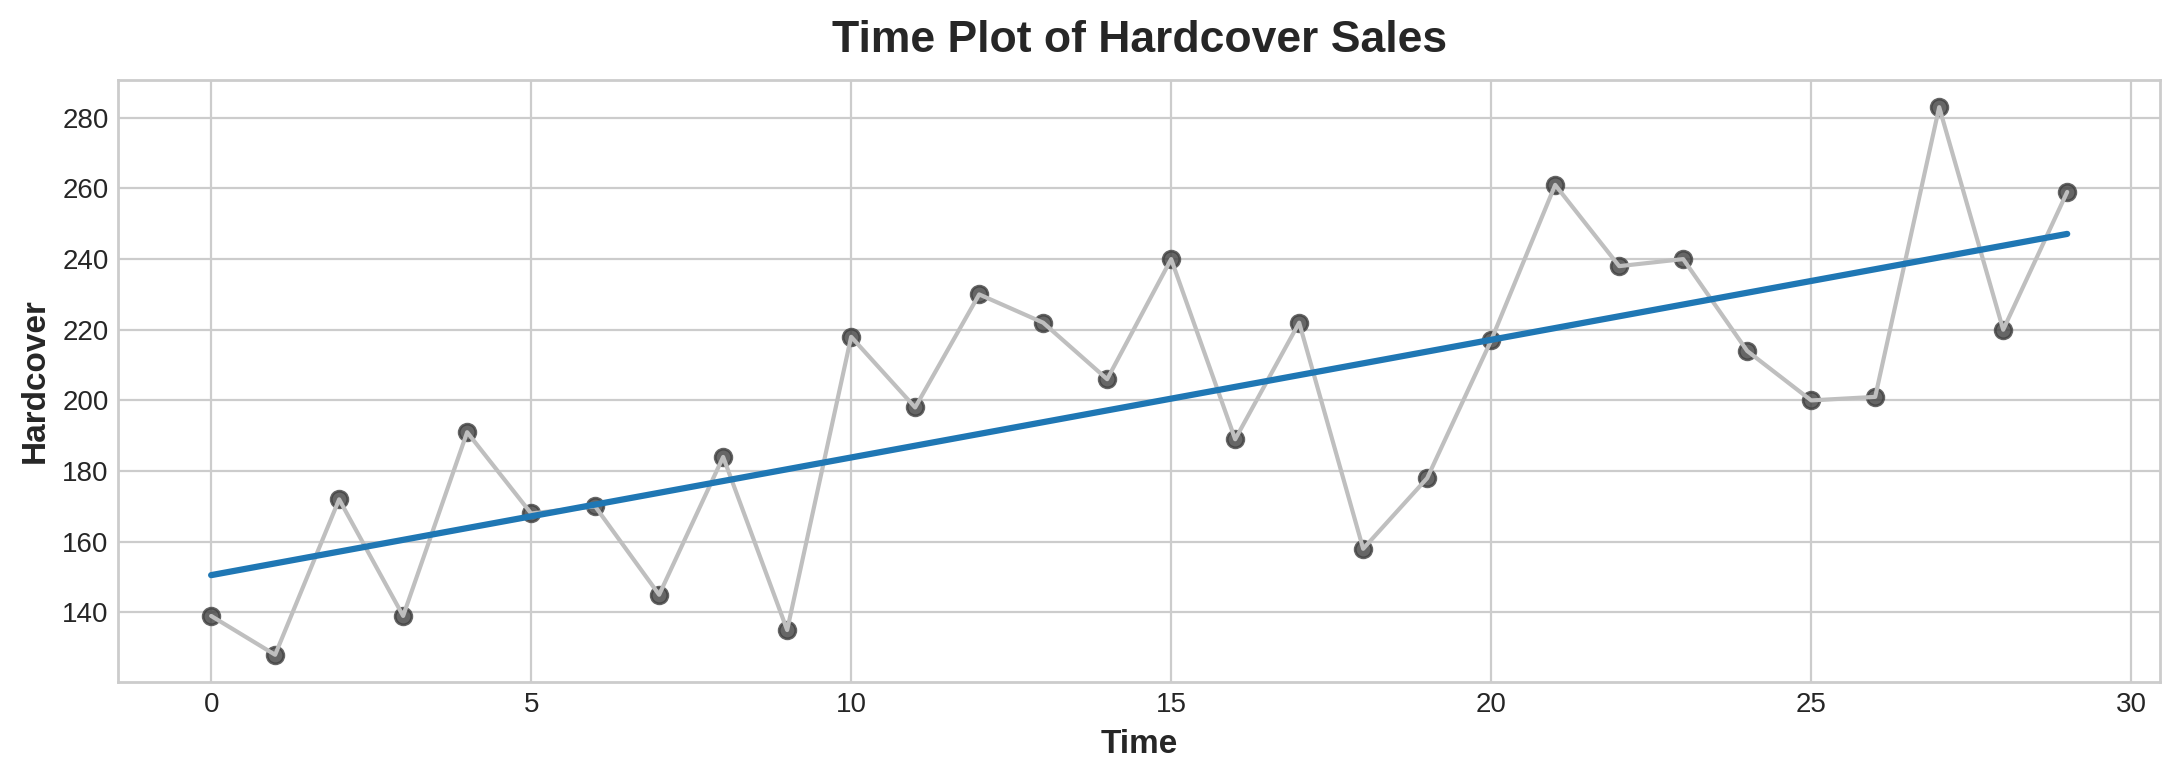

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure',
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

In [9]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns=['Hardcover', 'Lag_1'])

df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


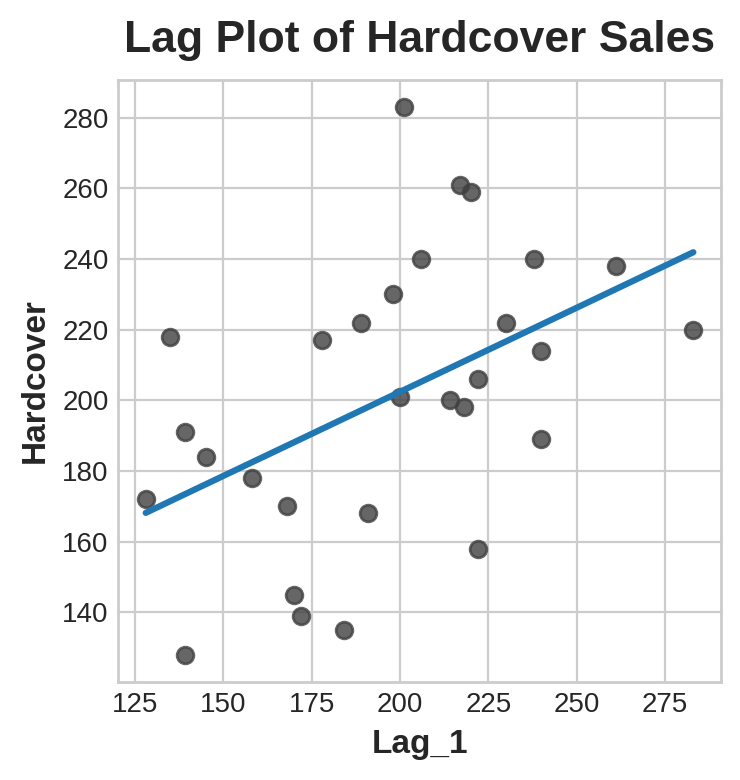

In [10]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales');

## 時系列データで予測モデルアンドを構築するときに用いる、５種類の主な特徴量

- ドメイン固有特徴量
- カレンダー特徴量
- ラグ特徴量
- ローリング特徴量
- エクスパンディング特徴量



## ラグ特徴量

今の時間の特徴だけに注目せずに、過去や未来の特徴を用いて現在データの特徴量を増やす方法。

過去のデータを特徴量として使い、機械学習モデルの予測精度を向上させたいときに使うことができる。

Pnadasは私たちにシンプルなshiftメソッドを提供し、そこからラグ特徴量を生成できる。

In [11]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns=['Hardcover', 'Lag_1'])

df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


ラグ特徴量を用いた線形回帰は以下のようなモデルを生成します

```
target = weight * lag + bias
```

So lag features let us fit curves to lag plots where each observation in a series is plotted against the previous observation.

# 5.Binary Classification

## Introducion


## Binary Classification（二値分類）

2つのクラスを1つ絞る分類では最も一般的な機械学習のタスクです。あなたは客が商品を購入するかどうかを予測したいです。

## Accuracy and Cross-Entropy


```
 accuracy = number_correct / total

```

## Cross-Entropy(交差エントロピー誤差)

教師あり学習では必須の損失関数。

教師あり学習の場合、学習するというのは損失関数の値を小さくすることと同義になる。

交差エントロピーは、分類問題を解くための損失関数としてよく用いられます。

多値分類では、活性化関数にSoftmax関数を用いてスコアを正規化し、交差エントロピー誤差を損失とする。

二値分類では、活性化関数にSigmoid関数を用いてスコアを正規化し、交差エントロピー誤差を損失とする。

In [18]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('/content/drive/MyDrive/data/ion.csv', index_col=0)

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4,activation = 'relu', input_shape=[33]),
    layers.Dense(4,activation='relu'),
    layers.Dense(1,activation='sigmoid'),
])

# 6.kerasでモデルを作成する

In [21]:
# 必要なライブラリの読み込み
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
# モデルを作成
model = keras.Sequential(name="my_model")
# modelを確認
print(model)